In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


# Short Visualization and analysis

## About CoronaViruses

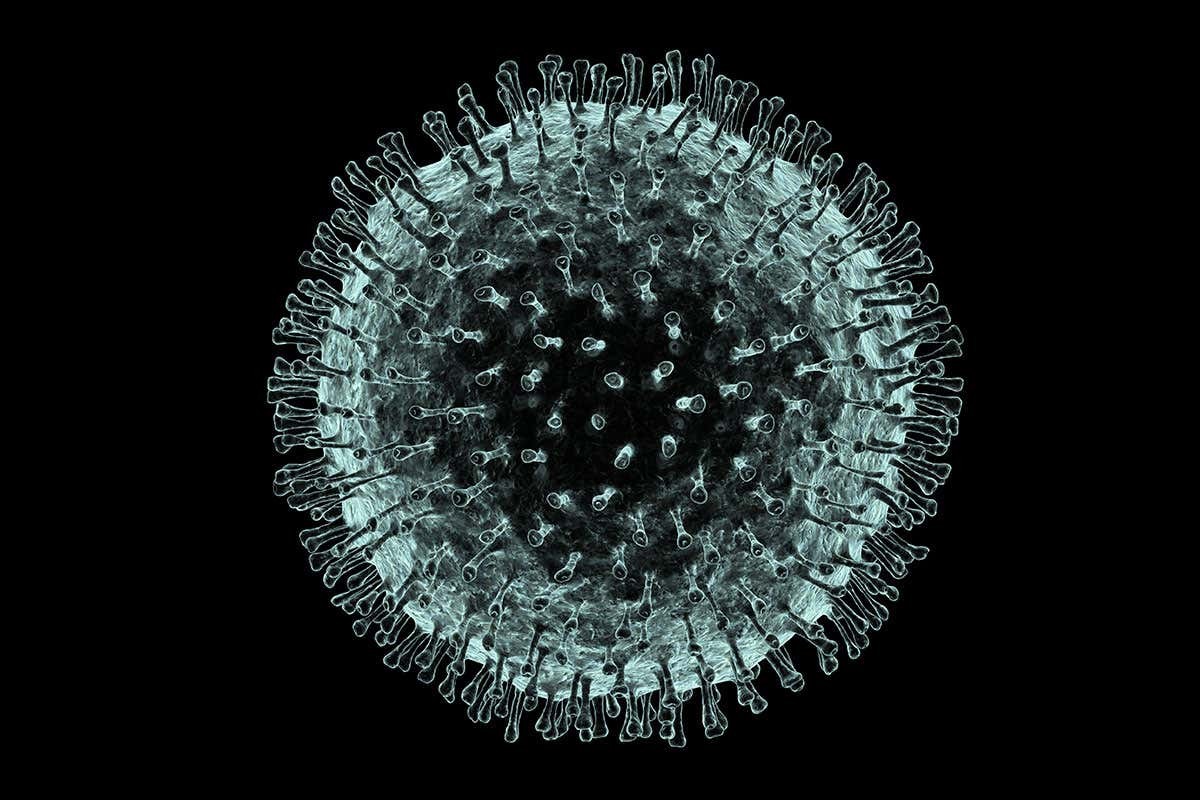


Coronaviruses are a group of related viruses that cause diseases in mammals and birds. In humans, coronaviruses cause respiratory tract infections that can be mild, such as some cases of the common cold (among other possible causes, predominantly rhinoviruses), and others that can be lethal, such as SARS, MERS, and COVID-19.

### Importing data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
sns.set()
pd.options.display.max_rows=1000
train=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-1/train.csv")
train['Date_str']=train['Date'].copy()
train['Date']=pd.to_datetime(train['Date'])

### Dictionary for population of countries

In [ ]:
pop_dict={'Afghanistan': 38928346,'Albania': 2877797,'Algeria': 43851044,'Andorra': 77265,'Argentina': 45195774,'Australia': 25499884,'Austria': 9006398,'Azerbaijan': 10139177,'Bahrain': 1701575,'Bangladesh': 164689383,'Belgium': 11589623,
          'Bosnia and Herzegovina': 3280819,'Brazil': 212559417,'Bulgaria': 6948445,'Burkina Faso': 20903273,'Canada': 37742154,'Chile': 19116201,'China': 1439323776,'Colombia': 50882891,'Costa Rica': 5094118,'Croatia': 4105267,'Cuba': 11326616,
          'Cyprus': 1207359,'Denmark': 5792202,'Dominican Republic': 10847910,'Ecuador': 17643054,'Egypt': 102334404,'Finland': 5540720,'France': 65273511,'Gabon': 2225734,'Germany': 83783942,'Ghana': 31072940,
          'Greece': 10423054,'Guatemala': 17915568,'Guyana': 786552,'Hungary': 9660351,'Iceland': 341243,'India': 1380004385,'Indonesia': 273523615,'Iran': 83992949,'Iraq': 40222493,'Ireland': 4937786,'Israel': 8655535,'Italy': 60461826,
          'Jamaica': 2961167,'Japan': 126476461,'Kazakhstan': 18776707,'Korea, South': 51269185,'Lebanon': 6825445,'Lithuania': 2722289,'Luxembourg': 625978,'Malaysia': 32365999,'Martinique': 375265,'Mauritius': 1271768,'Mexico': 128932753,
          'Moldova': 4033963,'Montenegro': 628066,'Morocco': 36910560,'Netherlands': 17134872,'Nigeria': 206139589,'North Macedonia': 2083374,'Norway': 5421241,'Pakistan': 220892340,'Panama': 4314767,'Paraguay': 7132538,'Peru': 32971854,
          'Philippines': 109581078,'Poland': 37846611,'Portugal': 10196709,'Romania': 19237691,'Russia': 145934462,'San Marino': 33931,'Saudi Arabia': 34813871,'Serbia': 8737371,'Seychelles': 98347,'Singapore': 5850342,
          'Slovakia': 5459642,'Slovenia': 2078938,'Somalia': 15893222,'South Africa': 59308690,'Spain': 46754778,'Sri Lanka': 21413249,'Sudan': 43849260,'Suriname': 586632,'Sweden': 10099265,'Switzerland': 8654622,'Thailand': 69799978,
          'Tunisia': 11818619,'Turkey': 84339067,'US': 331002651,'Ukraine': 43733762,'United Arab Emirates': 9890402,'United Kingdom': 67886011,'Uruguay': 3473730,'Uzbekistan': 33469203,'Venezuela': 28435940,'Vietnam': 97338579}

## Finding the total positive cases and deaths per country

In [ ]:
tp=pd.DataFrame(columns=['country','ConfirmedCases','Fatalities'])

for coun in train['Country/Region'].unique():
    inter_db=train[train['Country/Region']==coun].groupby(['Date']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']}).reset_index()
    inter_db.columns=[	'Date',	'ConfirmedCases',	'Fatalities']
    tp.loc[tp.shape[0]]=[coun,inter_db.ConfirmedCases.max(),inter_db.Fatalities.max()]


In [ ]:
tp.sort_values(by=['Fatalities'],ascending=False).head(10)

## Infection Rate Visualization 

Rate of infection is an important metric for analyzing the spread of the virus and it's far reaching impact.<br/> 
The calculation of its rate will involve finding the total postive cases per country , normalized by the countire's population

In [ ]:
def plot_infection_rate(train,country_list):
    fig = make_subplots(rows=1, cols=1)
    fig.update_layout(height=500, width=800, title_text="Infection Rate ")
    for country in country_list:
        c_db=train[train['Country/Region']==country].groupby(['Date','Date_str']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']}).reset_index()
        c_db.columns=[	'Date',	'Date_str',	'ConfirmedCases',	'Fatalities']
        #c_db=c_db[c_db.ConfirmedCases>50]
        c_db['ratio']=(100*c_db['ConfirmedCases'])/pop_dict[country]
        fig.add_trace(
                  go.Scatter(
                            x=c_db['Date_str'].values,
                            y=c_db['ratio'].values
                            ,mode='lines+markers',
                            text=list(c_db.ConfirmedCases.values),
                             name=country,
                            ) 
                  )
    fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Infection Rate",
        )
    fig.show()


Here we will plot the rate for Italy, Iran and China

In [ ]:
Name_of_countries_to_plot=['Italy','Iran','China']
plot_infection_rate(train,Name_of_countries_to_plot)

## Globe Visualization of Fatalities

Visualizing the fatalities via plotly's globe animation

In [ ]:
total_df = train.groupby(['Date','Date_str', 'Country/Region'])['ConfirmedCases', 'Fatalities'].sum()
total_df = total_df.reset_index()
fig = px.scatter_geo(total_df, locations="Country/Region", locationmode='country names', 
                      color="Fatalities", size='Fatalities', hover_name="Country/Region", 
                      projection="natural earth", animation_frame="Date_str", 
                      title='Total Fatalities over time'
                      )
fig.update(layout_coloraxis_showscale=False)
fig.show()

## Visualizing PositiveCases/Fatalities per million population

In [ ]:
class plot_per_million:
    def __init__(self,list_of_count_to_plot,data,column_to_plot):
        self.list_of_count_to_plot=list_of_count_to_plot
        self.train=data
        self.column_to_plot=column_to_plot
    
    def initiate_plotting(self,):
        fig = make_subplots(rows=1, cols=1)
        fig.update_layout(height=500, width=800, title_text="Number of {} per million population vs no of days since 10 {} per million population ".format(self.column_to_plot,self.column_to_plot))
        for countt in self.list_of_count_to_plot:
            self.plotter(self.return_count_data(countt,self.train),countt,fig)
        fig.update_layout(
            xaxis_title="no of days since 10 cases",
            yaxis_title="Number of {} per million population".format(self.column_to_plot),
                            )
        fig.update_yaxes(tick0=10)
        fig.update_yaxes(tickvals=[10, 100, 200, 500,1000])
        fig.show()

    def return_count_data(self,countt,train):
        iran_db=train[train['Country/Region']==countt].groupby(['Date','Date_str']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']}).reset_index()
        iran_db.columns=[	'Date',	'Date_str',	'ConfirmedCases',	'Fatalities']
        iran_db_tp=iran_db[(iran_db[self.column_to_plot]/(pop_dict[countt]/1000000))>=10].copy()
        iran_db_tp['to_sub']=[iran_db_tp.head(1).Date_str.values[0]]*iran_db_tp.shape[0]
        iran_db_tp['to_sub']=pd.to_datetime(iran_db_tp['to_sub'])
        iran_db_tp['diff']=(iran_db_tp['Date']-iran_db_tp['to_sub']).dt.days
        return iran_db_tp

    def plotter(self,db_tp,countt,fig):
        fig.add_trace(go.Scatter(
                            x=db_tp['diff'].values,
                            y=db_tp[self.column_to_plot].values/(pop_dict[countt]/1000000)
                             ,mode='lines+markers',
                              text=list(db_tp.Date_str.values),name=countt,
                            ) )


In [ ]:
list_of_countries_to_plot=['Italy','Iran','Spain','US']
Feature_to_plot_on='ConfirmedCases'

In [ ]:
plotter_obj=plot_per_million(list_of_countries_to_plot,train,Feature_to_plot_on)
plotter_obj.initiate_plotting()

# Lag plots

Lag plot is a popular time domain technique <br/>

A lag is a fixed time displacement. For example, given a data set Y1, Y2 ..., Yn, Y2 and Y7 have lag 5 since 7 - 2 = 5. Lag plots can be generated for any arbitrary lag, although the most commonly used lag is 1.<br/>

A lag plot checks whether a data set or time series is random or not.<br/>

1. Random data should not exhibit any identifiable structure in the lag plot
2. Non-random structure in the lag plot indicates that the underlying data are not random

Lag plots help you make conclusion about the data whether there is presence of weak/strong Autocorrelation 

In [ ]:
def create_lag_plot(country,shift_val1,shift_val2,col_tocheck):
    """
    country     : name of the country who's data is to be analyzed
    shift_val1  : lag value for the first plot
    shift_val2  : lag value for the second plt
    col_tocheck : column name on which analysis is to be performed
    """

    fig = make_subplots(rows=1, cols=2,subplot_titles=("lag {} plot for {} in {}".format(shift_val1,col_tocheck,country),
                                                                                    "lag {} plot for {} in {}".format(shift_val2,col_tocheck,country)))

    fig.update_layout(height=500, width=1000, title_text="Lag Plots")


    country_db=train[train['Country/Region']==country].copy()

    fig.add_trace(go.Scatter(
                            x=list(country_db[col_tocheck].shift(shift_val1).values),
                            y=list(country_db[col_tocheck].values),mode='lines+markers',
                             text=list(country_db['Date_str'].shift(shift_val1).values)
                            ),
                  row=1, col=1 )
    fig.update_xaxes(title_text="x_t", row=1, col=1)
    fig.update_yaxes(title_text="x_(t+{})".format(shift_val1), row=1, col=1)
    fig.add_trace(go.Scatter(
                            x=list(country_db[col_tocheck].shift(shift_val2).values),
                            y=list(country_db[col_tocheck].values),mode='lines+markers',
                             text=list(country_db['Date_str'].shift(shift_val2).values)
                            ),
                  row=1, col=2 )
    fig.update_xaxes(title_text="x_t", row=1, col=2)
    fig.update_yaxes(title_text="x_(t+{})".format(shift_val2), row=1, col=2)
    
    fig.show()
create_lag_plot('Iran',1,13,'ConfirmedCases')
create_lag_plot('Iran',1,13,'Fatalities')

We can derive the following analysis from the above above lag plots 
1. There is a strong Autocorrelation present as seen per the lag 1 scatter plot
2. The lag 13 scatter plot helps us analyze how the augmentation in values is restrained over time.It also represents how quickly the cases increased in the initial stages of the spread of the virus

In order to quantify the correlation present in the series, where **Pearson coefficient** can be used


### Pearson coefficient

Pearson coefficient is calculated as :<br/>
<font size="3">
$$\frac{\sum({X_t-X_{mean}})\sum({Y_t-Y_{mean}})}
{ \sqrt{ \sum({X_t-X_{mean}})^2 \sum{(Y_t-Y_{mean}})^2
        }
}$$
    </font>


Pearson coefficient is a measure of the linear correlation between two variables X and Y.<br/>
This coefficient can be interpreted in many ways ,for example, if we use X and Y to form two vectors, then
Pearson's coefficient is the cosine of the angle between them<br/>
Hence the smaller the angle,the higher the coefficient value, and the more correlated the two vectors would be. <br/>
In case of comparison between a time series and lagged time series, the pearson coefficient value is also known as autocorrelation value ( Furthur reading https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm).<br/>
The most easiest way to find the correlation value is to use numpy's 'corrcoef' function.

In [ ]:
country_db=train[train['Country/Region']=='Iran'].copy()
shift_val1=1
col_tocheck='ConfirmedCases'
dft=country_db[col_tocheck].shift(shift_val1).to_frame('shifted').join(country_db[col_tocheck].to_frame('val')).dropna()
print('Coefficient value is : ',np.corrcoef(dft['shifted'],dft['val'])[0][1])